<a href="https://colab.research.google.com/github/BecomeAllan/RNN/blob/main/Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratório

## Implementações com RNNs

# O que é uma RNN ?

Uma Recurrent neural network (RNN) é uma arquitetura de Rede Neural que processa dados sequenciais, como palavra por palavra em uma frase ou informações através do tempo.

Algo notável na RNN é a capacidade de processar sequências independente do tamanho do vetor de entrada, não precisando ter um tamanho fixo para poder rodar a rede. Por exemplo, uma única rede poderia processar frases com 3, 5, 10 ou mais palavras na mesma rede.

Algumas aplicações são mostradas na imagem a seguir, no qual a *one to one* seria uma rede do tipo *FeedFoward*.


![image](https://raw.githubusercontent.com/BecomeAllan/RNN/main/images/Aquitetura.png)

[Imagem retirada daqui](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)


# Comportamento de uma RNN

O comportamento de uma célula padrão de RNN é através de um loop, onde o $x_t$ é o input confome o tempo $t$ e está célula representada por $h_t$ transporta a informação para a próxima $h_{t+1}$ com a informação adicional para atualizar junto com o $x_{t+1}$.

O comportamento de um estado de célula $h_t$ diz conforme a próxima informação vai ser processada, criando uma correlação do estado passado para o presente $t$.

<img src="https://raw.githubusercontent.com/BecomeAllan/RNN/main/images/Esquelto.png" alt="rnn" width="700"/>


<img src="https://raw.githubusercontent.com/BecomeAllan/RNN/main/images/Feedfoward.png" alt="rnn" width="700"/>

[Imagens retiradas daqui](http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L2.pdf)

## Pseudo-código de uma célula RNN

Queremos que a célula de RNN complete a frase:
+ "I love recurrent neural"

prevendo na última interação a palavra:
+ "network".

In [ ]:
rnn_cell = RNN()

# Inicial h_t
hidden_state = [0,0,0,0]

X_t = ['I', 'love', 'recurrent', 'neural'] ## input [x_1, x_2, x_3, x_4 ] output da Y_4 = ['network']

for word in X_t:
  y_hat, hidden_state = rnn_cell(word, hidden_state)

# ['network']
next_word_predict = y_hat

## Pseudo-código de uma célula RNN para amantes do KERAS

In [1]:
# Bibliotecas usadas
import tensorflow as tf
from tensorflow import keras
import numpy as np
    
dot = tf.matmul
   
# Criando a layer RNN
class RNN_cell(keras.layers.Layer):
  def __init__(self, rnn_units, input_dim, output_dim):
    super(RNN_cell, self).__init__()

    # Pesos
    self.W_xh = self.add_weight(shape = (rnn_units, input_dim), initializer="random_normal", dtype='float32')
    self.W_hh = self.add_weight(shape = (rnn_units, rnn_units), initializer="random_normal", dtype='float32')
    self.W_hy = self.add_weight(shape = (output_dim, rnn_units), initializer="random_normal", dtype='float32')

    # Estado (h_0) inicial 
    self.h = tf.zeros([rnn_units, 1])
  
  def call(self, x):
    # x -> h
    # Atualiza o estado h_t
    self.h = tf.tanh( dot(self.W_hh, self.h) + dot( self.W_xh, x))

    # h -> y
    # 'Dense'
    predict = dot( self.W_hy, self.h)
    return predict

  def get_config(self):
    return {"W_xh": self.W_xh.numpy(),
            "W_hh": self.W_hh.numpy(),
            "W_hy": self.W_hy.numpy(),
            "h": self.h.numpy()}


# Constantes
RNN_UNITS = 2
INPUT_DIM = 2
OUTPUT_DIM = 1



x = np.array([[1,3,5,7,9],
              [2,4,6,8,10]], dtype='float32')
print(f'Shape do input: {x.shape}')

hidden = RNN_cell(RNN_UNITS, INPUT_DIM, OUTPUT_DIM)

temp = x.shape[1]

config = hidden.get_config()
####
print(f"Pesos: \n W_xh:\n{config['W_xh']}\n\n W_hh:\n{config['W_hh']}\n\n W_hy:\n{config['W_hy']}\n\n h:\n{config['h']}")

Shape do input: (2, 5)
Pesos: 
 W_xh:
[[ 0.05334038 -0.03994577]
 [-0.08501535 -0.04697952]]

 W_hh:
[[ 0.01305127  0.06617929]
 [-0.11289008 -0.0809973 ]]

 W_hy:
[[0.01771818 0.00290708]]

 h:
[[0.]
 [0.]]


In [2]:
print(f'rnn_units: {RNN_UNITS} | input_dim: {INPUT_DIM} | output_dim: {OUTPUT_DIM} |  Número de sequencias: {temp}')
print(f"Input: \n {x}\n")
for t in range(0, temp):
  ht = hidden.get_config()
  xt = x[:,t]
  xt = xt.reshape((2,1))
  y_hat = hidden(xt)
  print(f"> Tempo (t):{t} \n> Valor do estado (h):\n{ht['h']} \n> Previu (y_hat): \n{y_hat}")
  print('----\n')

keras.backend.clear_session()

rnn_units: 2 | input_dim: 2 | output_dim: 1 |  Número de sequencias: 5
Input: 
 [[ 1.  3.  5.  7.  9.]
 [ 2.  4.  6.  8. 10.]]

> Tempo (t):0 
> Valor do estado (h):
[[0.]
 [0.]] 
> Previu (y_hat): 
[[-0.00098514]]
----

> Tempo (t):1 
> Valor do estado (h):
[[-0.02654492]
 [-0.17708758]] 
> Previu (y_hat): 
[[-0.00137721]]
----

> Tempo (t):2 
> Valor do estado (h):
[[-0.01182738]
 [-0.40165758]] 
> Previu (y_hat): 
[[-0.00170131]]
----

> Tempo (t):3 
> Valor do estado (h):
[[ 2.9147230e-04]
 [-5.8700585e-01]] 
> Previu (y_hat): 
[[-0.00184968]]
----

> Tempo (t):4 
> Valor do estado (h):
[[ 0.01497152]
 [-0.7275163 ]] 
> Previu (y_hat): 
[[-0.00182498]]
----



## Quantidade de  células (unidades) de RNN

+ Veja pelo diagrama que não existe conexão entre as unidades de RNN mas apenas entre suas próprias células.

<img src="https://raw.githubusercontent.com/BecomeAllan/RNN/main/images/Units.png" alt="units" width="700"/>

# Quando usar uma RNN ?

Como já introduzido, uma RNN é usada quando os dados tem interação conforme o "tempo" passa, ou melhor dizendo, se suas variáveis de *input* tem uma correlação com as dadas sequências destas.

Ou seja, se uma sequência é passada para uma RNN, como $x_1=[1,2,3]$ e sua "resposta" seria o inverso dela, $y=[3,2,1]$, observa-se que existe uma relação entre a sequência do *input* $x$ que diz muito sobre como será o *output*.

Há muitos outros exemplos que podem ser explorados com RNNs e alguns deles serão abordados por este documento.

Alguns tipos de dados que são usados para utilizar RNNs:
+ **Tipo de dados:** Sequências, One-Hot-Encode...

In [3]:
#@title Funções auxiliares

from random import randint, seed

def sequence(zero_to , n):	
  return [randint(0, zero_to) for _ in range(n)]

def backsequence(seq):
  return seq[::-1]

def one_hot_encode(data, max_lenght):
  new_data = list()
  for x in data:
    hot = [0]*(max_lenght)
    hot[x] = 1
    new_data.append(hot)

  return new_data

def one_hot_decode(data):
  return [np.argmax(x) for x in data]


def create_dataset(train_size, test_size, time_steps, vocabulary_size):
  x = [sequence(vocabulary_size - 1 , time_steps) for _ in range(train_size)]
  y = [backsequence(y) for y in x]
  X_train = np.array([one_hot_encode(x, vocabulary_size) for x in x])
  Y_train = np.array([one_hot_encode(y, vocabulary_size) for y in y])
  
  x = [sequence(vocabulary_size - 1 , time_steps) for _ in range(test_size)]
  y = [backsequence(y) for y in x]
  X_test = np.array([one_hot_encode(x, vocabulary_size) for x in x])
  Y_test = np.array([one_hot_encode(y, vocabulary_size) for y in y])

  return X_train, Y_train, X_test, 	Y_test

def plot(p):
	plt.plot(p.history['accuracy'])
	plt.plot(p.history['val_accuracy'])
	plt.title('accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
 
	plt.plot(p.history['loss'])
	plt.plot(p.history['val_loss'])
	plt.title('loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

## Exemplo 1.1: Artificial neural network

Conforme o exemplo da sequência $x_1=[1,2,3]$ e $y=[3,2,1]$, exploramos estes dados com uma rede neural *feedfoward* para avaliar sua resposta.

### Criando o dataset

In [4]:
# Dados em one-hot-encode
X_train, Y_train, X_test, Y_test = create_dataset(train_size=20000, test_size=200, time_steps=5, vocabulary_size=10)

print(f'Amostra 1:\n\
x = {one_hot_decode(X_train[0])}\n \
one_hot_encode do x:\n \
{X_train[0]}\n\n \
y = {one_hot_decode(Y_train[0])}\n \
one_hot_encode do y:\n \
{Y_train[0]}')

Amostra 1:
x = [2, 0, 2, 5, 0]
 one_hot_encode do x:
 [[0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]

 y = [0, 5, 2, 0, 2]
 one_hot_encode do y:
 [[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]


### Modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5, 32)             352       
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 32)             128       
_________________________________________________________________
dense_1 (Dense)              (None, 5, 64)             2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 64)             256       
_________________________________________________________________
dense_2 (Dense)              (None, 5, 10)             650       
Total params: 3,498
Trainable params: 3,306
Non-trainable params: 192
_________________________________________________________________


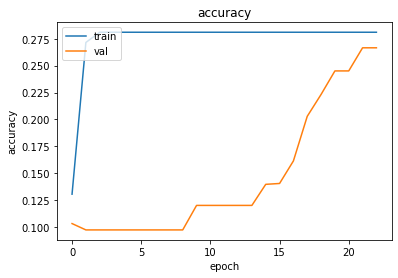

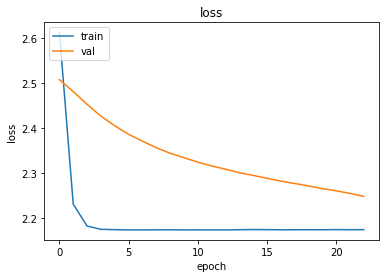

--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 9, 9, 9, 2], [9, 4, 3, 6, 7], [2, 4, 9, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 9, 9, 5]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]


In [5]:
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

VOCAB_SIZE = 10
TIME_STEPS = 5

# Modelo RNA feedfoward
modelo = keras.Sequential(
    [
     keras.Input(shape=(TIME_STEPS ,VOCAB_SIZE), name="Input"),
     layers.Dense(32, activation='sigmoid'),
     layers.BatchNormalization(),
     layers.Dense(64, activation='sigmoid'),
     layers.BatchNormalization(),
     layers.Dense(10, activation= "softmax")
    ]
)

modelo.summary()

# Treinando modelo
modelo.compile(optimizer='adam', metrics=['accuracy'], loss= keras.losses.categorical_crossentropy)
hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

# Grafico
plot(hist)

# Previsões
y_hat = modelo(X_test[0:10])


x = [one_hot_decode(y) for y in X_test[0:10] ]
y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
y = [one_hot_decode(y) for y in Y_test[0:10] ]

print("--Algumas previsões---")
print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')

keras.backend.clear_session()

## Exemplo 1.2: RNN

Agora, o exemplo vai ser aplicado com uma RNN para avaliar sua capacidade.

### Modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 16)                432       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 5, 16)             0         
_________________________________________________________________
dense (Dense)                (None, 5, 10)             170       
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


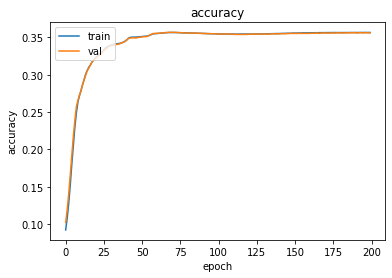

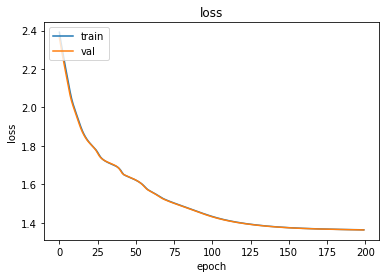

--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [5, 5, 5, 5, 5]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]


In [6]:
from tensorflow import keras
from keras import layers

VOCAB_SIZE = 10
TIME_STEPS = 5

# Modelo RNN
modelo = keras.Sequential(
    [
     keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
     # Output do RNN é o ultimo valor da sequencia
     layers.SimpleRNN(16),
     # Replica o valor do output TIME_STEPS vezes
     layers.RepeatVector(TIME_STEPS),
     layers.Dense(VOCAB_SIZE, activation= "softmax")
    ]
)

modelo.summary()

# Treinando modelo
modelo.compile(optimizer='adam', metrics=['accuracy'], loss= keras.losses.categorical_crossentropy)
hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

# Grafico
plot(hist)

# Previsões
y_hat = modelo(X_test[0:10])


x = [one_hot_decode(y) for y in X_test[0:10] ]
y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
y = [one_hot_decode(y) for y in Y_test[0:10] ]

print("--Algumas previsões---")
print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')

keras.backend.clear_session()

### Diferentes quantidades de células de RNN

In [7]:
#@title Funções auxiliares
def rnn_model(unn):
  modelo = keras.Sequential(
      [
       keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
       # Output do RNN é o ultimo valor da sequencia
       layers.SimpleRNN(unn),
       # Replica o valor do output TIME_STEPS vezes
       layers.RepeatVector(TIME_STEPS),
       layers.Dense(VOCAB_SIZE, activation= "softmax")
     ]
    )
  modelo.compile(optimizer='adam', metrics=['accuracy'],
                 loss= keras.losses.categorical_crossentropy)
  hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

  # Previsões
  y_hat = modelo(X_test[0:10])
  y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)

  x = [one_hot_decode(y) for y in X_test[0:10] ]
  y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
  y = [one_hot_decode(y) for y in Y_test[0:10] ]

  print(f"Acurácia: {round(y_hat_v[1],2)}")
  print("--Algumas previsões---")
  print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')
  keras.backend.clear_session()


In [8]:
## Unidades de RNN
for u in [2,4,16]:
  print(f'Unidades de RNN: {u}')
  rnn_model(u)
  print('\n\n')

Unidades de RNN: 2
Acurácia: 0.22
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [1, 1, 1, 1, 1], [3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [4, 4, 4, 4, 4], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1], [4, 4, 4, 4, 4], [5, 5, 5, 5, 5]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]



Unidades de RNN: 4
Acurácia: 0.3
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [5, 5, 5, 5, 5], [9, 9, 9, 9, 9], [8, 8, 8, 8, 8], [9, 9, 9, 9, 9], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8]]
y:
[[3

### RNN com mais profundidade

In [9]:
#@title Funções auxiliares
def rnn_model_multilayer(unn):
  modelo = keras.Sequential(
      [
       keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
       # Output do RNN é o ultimo valor da sequencia
       layers.SimpleRNN(unn),
       layers.RepeatVector(TIME_STEPS),
       layers.SimpleRNN(unn),
       layers.RepeatVector(TIME_STEPS),
       layers.SimpleRNN(unn),
       # Replica o valor do output TIME_STEPS vezes
       layers.RepeatVector(TIME_STEPS),
       layers.Dense(VOCAB_SIZE, activation= "softmax")
     ]
    )
  modelo.compile(optimizer='adam', metrics=['accuracy'],
                 loss= keras.losses.categorical_crossentropy)
  hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

  # Previsões
  y_hat = modelo(X_test[0:10])
  y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)

  x = [one_hot_decode(y) for y in X_test[0:10] ]
  y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
  y = [one_hot_decode(y) for y in Y_test[0:10] ]

  print(f"Acurácia: {round(y_hat_v[1],2)}")
  print("--Algumas previsões---")
  print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')
  keras.backend.clear_session()


In [10]:

## Unidades de RNN
for u in [2,4,16]:
  print(f'Unidades de RNN: {u}')
  rnn_model_multilayer(u)
  print('\n\n')


Unidades de RNN: 2
Acurácia: 0.2
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[6, 6, 6, 6, 6], [9, 9, 9, 9, 9], [5, 5, 5, 5, 5], [8, 8, 8, 8, 8], [7, 7, 7, 7, 7], [9, 9, 9, 9, 9], [0, 0, 0, 0, 0], [5, 5, 5, 5, 5], [0, 0, 0, 0, 0], [5, 5, 5, 5, 5]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]



Unidades de RNN: 4
Acurácia: 0.27
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [5, 5, 5, 5, 5], [0, 0, 0, 0, 0], [8, 8, 8, 8, 8], [4, 4, 4, 4, 4], [6, 6, 6, 6, 6], [3, 3, 3, 3, 3], [3, 3, 3, 3, 3], [6, 6, 6, 6, 6], [5, 5, 5, 5, 5]]
y:
[[3

### RNN com LSTM

In [11]:
#@title Funções auxiliares
def rnn_model_LSTM(unn):
  modelo = keras.Sequential(
      [
       keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
       # Output do RNN é o ultimo valor da sequencia
       layers.LSTM(unn),
       layers.RepeatVector(TIME_STEPS),
       layers.LSTM(unn),
       layers.RepeatVector(TIME_STEPS),
       layers.LSTM(unn),
       # Replica o valor do output TIME_STEPS vezes
       layers.RepeatVector(TIME_STEPS),
       layers.Dense(VOCAB_SIZE, activation= "softmax")
     ]
    )
  modelo.compile(optimizer='adam', metrics=['accuracy'],
                 loss= keras.losses.categorical_crossentropy)
  hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

  # Previsões
  y_hat = modelo(X_test[0:10])
  y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)

  x = [one_hot_decode(y) for y in X_test[0:10] ]
  y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
  y = [one_hot_decode(y) for y in Y_test[0:10] ]

  print(f"Acurácia: {round(y_hat_v[1],2)}")
  print("--Algumas previsões---")
  print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')
  keras.backend.clear_session()


In [12]:

## Unidades de RNN
for u in [2,4,16]:
  print(f'Unidades de RNN: {u}')
  rnn_model_LSTM(u)
  print('\n\n')


Unidades de RNN: 2
Acurácia: 0.21
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [7, 7, 7, 7, 7], [3, 3, 3, 3, 3], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [8, 8, 8, 8, 8]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]



Unidades de RNN: 4
Acurácia: 0.29
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 3, 3, 3, 3], [7, 7, 7, 7, 7], [2, 2, 2, 2, 2], [8, 8, 8, 8, 8], [7, 7, 7, 7, 7], [2, 2, 2, 2, 2], [2, 2, 2, 2, 2], [3, 3, 3, 3, 3], [0, 0, 0, 0, 0], [9, 9, 9, 9, 9]]
y:
[[

RNN com LSTM e return_seq = TRUE

In [13]:
#@title Funções auxiliares
def rnn_model_LSTM_SEQ(unn):
  modelo = keras.Sequential(
      [
       keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
       # Output do RNN é o ultimo valor da sequencia
       layers.LSTM(unn, return_sequences=True),
       layers.LSTM(unn, return_sequences=True),
       # Replica o valor do output TIME_STEPS vezes
       layers.TimeDistributed(layers.Dense(VOCAB_SIZE, activation= "softmax"))
     ]
    )
  modelo.compile(optimizer='adam', metrics=['accuracy'],
                 loss= keras.losses.categorical_crossentropy)
  hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

  # Previsões
  y_hat = modelo(X_test[0:10])
  y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)

  x = [one_hot_decode(y) for y in X_test[0:10] ]
  y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
  y = [one_hot_decode(y) for y in Y_test[0:10] ]

  print(f"Acurácia: {round(y_hat_v[1],2)}")
  print("--Algumas previsões---")
  print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')
  keras.backend.clear_session()


In [14]:

## Unidades de RNN
for u in [2,4,16]:
  print(f'Unidades de RNN: {u}')
  rnn_model_LSTM_SEQ(u)
  print('\n\n')


Unidades de RNN: 2
Acurácia: 0.16
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[5, 8, 8, 8, 8], [0, 3, 3, 3, 7], [0, 3, 3, 3, 3], [0, 9, 9, 9, 6], [0, 9, 8, 8, 8], [0, 5, 5, 5, 5], [0, 3, 3, 7, 7], [0, 3, 3, 3, 3], [0, 3, 3, 3, 3], [0, 0, 0, 0, 4]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]



Unidades de RNN: 4
Acurácia: 0.29
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[4, 9, 9, 9, 9], [4, 7, 7, 7, 7], [4, 9, 9, 4, 4], [2, 5, 1, 6, 2], [0, 3, 8, 8, 8], [2, 4, 2, 2, 2], [0, 3, 3, 3, 3], [0, 9, 9, 3, 3], [4, 9, 9, 4, 7], [0, 5, 5, 0, 0]]
y:
[[

In [15]:
#@title Funções auxiliares
def rnn_model_state(unn):
  input = keras.Input(shape=(TIME_STEPS, VOCAB_SIZE))

  lstm1 = layers.LSTM(unn, return_state= True)
  LSTM_output, state_h, state_c = lstm1(input)
  states = [state_h, state_c]

  repeat = layers.RepeatVector(TIME_STEPS)
  LSTM_output = repeat(LSTM_output)

  lstm2 = layers.LSTM(unn, return_sequences=True)
  all_state_h = lstm2(LSTM_output, initial_state = states)

  dense = layers.TimeDistributed(layers.Dense(VOCAB_SIZE,"softmax" ))

  out = dense(all_state_h)

  modelo = keras.Model(input,out)
  modelo.compile(optimizer='adam', metrics=['accuracy'],
                 loss= keras.losses.categorical_crossentropy)
  hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  callbacks=keras.callbacks.EarlyStopping('loss', patience=10),
                  verbose=0)

  # Previsões
  y_hat = modelo(X_test[0:10])
  y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)

  x = [one_hot_decode(y) for y in X_test[0:10] ]
  y_hat_num = [[np.argmax(y) for y in k] for k in y_hat]
  y = [one_hot_decode(y) for y in Y_test[0:10] ]

  print(f"Acurácia: {round(y_hat_v[1],2)}")
  print("--Algumas previsões---")
  print(f'x:\n{x}\ny_hat:\n{y_hat_num}\ny:\n{y}')
  keras.backend.clear_session()


In [16]:

## Unidades de RNN
for u in [2,4,16]:
  print(f'Unidades de RNN: {u}')
  rnn_model_state(u)
  print('\n\n')


Unidades de RNN: 2
Acurácia: 0.25
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[4, 0, 6, 6, 6], [7, 9, 0, 6, 6], [5, 5, 8, 7, 9], [5, 5, 3, 5, 3], [6, 6, 0, 0, 0], [6, 6, 0, 0, 0], [3, 8, 8, 8, 3], [3, 5, 5, 5, 3], [7, 7, 0, 6, 6], [5, 5, 3, 5, 8]]
y:
[[3, 6, 0, 3, 9], [7, 6, 1, 2, 7], [2, 2, 0, 5, 7], [2, 9, 8, 8, 2], [7, 6, 3, 4, 8], [9, 6, 8, 4, 2], [0, 3, 2, 7, 3], [4, 2, 5, 2, 3], [2, 6, 0, 5, 7], [5, 9, 8, 5, 0]]



Unidades de RNN: 4
Acurácia: 0.44
--Algumas previsões---
x:
[[9, 3, 0, 6, 3], [7, 2, 1, 6, 7], [7, 5, 0, 2, 2], [2, 8, 8, 9, 2], [8, 4, 3, 6, 7], [2, 4, 8, 6, 9], [3, 7, 2, 3, 0], [3, 2, 5, 2, 4], [7, 5, 0, 6, 2], [0, 5, 8, 9, 5]]
y_hat:
[[3, 5, 0, 0, 7], [7, 6, 6, 6, 6], [0, 0, 0, 0, 0], [2, 4, 8, 8, 8], [7, 8, 8, 8, 8], [9, 6, 6, 6, 6], [2, 3, 3, 7, 3], [4, 6, 2, 0, 0], [2, 0, 0, 0, 0], [5, 5, 5, 5, 5]]
y:
[[

# Aplicações com RNN

Assim como foi visto

In [5]:
#@title Funções Auxiliares

def one_hot_decode(data):
  return [np.argmax(x) for x in data]

def plot(p):
	plt.plot(p.history['accuracy'])
	plt.plot(p.history['val_accuracy'])
	plt.title('accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
 
	plt.plot(p.history['loss'])
	plt.plot(p.history['val_loss'])
	plt.title('loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
 
def one_hot_encode_K(data, max_lenght):
  new_data = list()
  for x in data:
    hot = [0]*(max_lenght)
    hot[x-1] = 1
    new_data.append(hot)
  return new_data

def one_hot_encode(data, max_lenght):
  new_data = list()
  for x in data:
    hot = [0]*(max_lenght)
    hot[x] = 1
    new_data.append(hot)
  return new_data


class Tokenizer_text():
  def __init__(self):
    self.regex = "[\'\n\t\d\\!\"\#\$\%\&\(\)\*\+,-./:;<=>\?@\[\]\^_`\{\|\}~]"

  def treat_text(self, text, regex = None):
    if regex:
      self.regex = regex
    
    return re.sub(self.regex, '', unidecode(text).lower())
  
  def treat_data(self, data, max_vocab = 0, regex = None):
    if regex:
      self.regex = regex
      

    treat = [self.treat_text(m) for m in data]
    
    join = ' '.join(treat)
    vocab = set(join.split())

    if (max_vocab==0):
      max_vocab = vocab

    elif len(vocab) <= max_vocab:
      self.vocab = sorted(vocab)
      self.dic = {u:(i+1) for i, u in enumerate(self.vocab)}
      idx_data = self.text2idx(treat)
      return idx_data

    new_vocab = ['<OAV>'] + sorted(sample(vocab, max_vocab-1))
    vocab = vocab - set(new_vocab)

    self.vocab = new_vocab
    self.dic = {u:i for i, u in enumerate(self.vocab)}
    self.dic['<OAV>'] = 0

   # text_data = [d.split(' ') for d in treat]
    idx_data = self.text2idx(treat)

    return idx_data

  def idx2text(self, idex):
    return [self.vocab[x] for x in idex]

  def text2idx(self, text):
    return [list(map(lambda x: self.dic[x] if x in self.dic else 0 , u.split(' '))) for u in text]

  def for_idx_data2_text(self, data):
    return [self.idx2text(x) for x in data]



class Tokenizer_text_text():
  def __init__(self):
    return

  def treat_text(self, text):
    return unidecode(text).lower()
  
  def treat_data(self, data, max_vocab = 0):
    treat = [self.treat_text(m) for m in data]
    
    join = '\n\n'.join(treat)
    self.vocab = sorted(set(join))
    self.dic = {u:(i+2) for i, u in enumerate(self.vocab)}
    
    if max_vocab <= len(self.vocab):
      self.vocab = sorted(sample(self.vocab, max_vocab))
      self.dic = {u:(i+2) for i, u in enumerate(self.vocab)}
      idx_data = self.text2idx(join)
      return idx_data
    
    idx_data = self.text2idx(join)

    return idx_data

  def idx2text(self, idex):
    return [self.vocab[x] for x in idex]

  def text2idx(self, text):
    return [ self.dic[j] for j in text]

  def for_idx_data2_text(self, data):
    return [self.idx2text(x) for x in data]
  

def get_batch(vectorized_songs, seq_length, batch_size):
  # the length of the vectorized songs string
  n = vectorized_songs.shape[0] - 1
  # randomly choose the starting indices for the examples in the training batch
  idx = np.random.choice(n-seq_length, batch_size)

  '''TODO: construct a list of input sequences for the training batch'''
  input_batch = [vectorized_songs[i : i+seq_length] for i in idx]
  # input_batch = # TODO
  '''TODO: construct a list of output sequences for the training batch'''
  output_batch = [vectorized_songs[i+1 : i+seq_length+1] for i in idx]
  # output_batch = # TODO

  # x_batch, y_batch provide the true inputs and targets for network training
  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])
  return x_batch, y_batch


In [4]:
#@title Bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from random import sample

import os
import time
import re

!pip install unidecode
from unidecode import unidecode

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Tratamento de dados

In [ ]:
#@title Baixando os dados
# Baixar dataset
!gdown --id 15FhPHu7Hx6ul_k-EEBZwzpUWznK0gBR3

!gdown --id 1Eq9oi3_1PuSZ5hoZS5M1A5pTMSyy3K_a

!gdown --id 1uqM4Mc2kynrFZQaDMpnfFOuYa0vw3vhn


In [6]:
#@title Dados
# Data1
poem_data = pd.read_csv("portuguese-poems.csv", encoding='UTF-8')

# Data2
cript_data = pd.read_csv("Ethereum Historical Data.csv", encoding='UTF-8')

# Data3
materias_data = pd.read_csv("Historico_de_materias.csv", encoding='UTF-8')

poem_data = poem_data.dropna()
cript_data = cript_data.dropna()
materias_data = materias_data.dropna()

### Tratamento portuguese-poems.csv

In [7]:
#@title Dados(poem_data): portuguese-poems.csv
poem_data.head()

,Author,Title,Content,Views
0,Cecília Meireles,Retrato,"Eu não tinha este rosto de hoje,\r\nAssim calm...",1018431
1,Fernando Pessoa,"Para ser grande, sê inteiro: nada","Para ser grande, sê inteiro: nada\r\nTeu exage...",1979413
2,Marina Colasanti,"Eu sei, mas não devia",Eu sei que a gente se acostuma. Mas não devia....,301509
3,Carlos Drummond de Andrade,Quadrilha,João amava Teresa que amava Raimundo\r\nque am...,1421206
4,Eugénio de Andrade,É urgente o amor,É urgente o amor.\r\nÉ urgente um barco no mar...,621197


In [8]:
### Poemas dados
poem_data.shape
# Quantos assuntos
len(poem_data['Author'].unique())

poem_data = poem_data[poem_data['Author']=='Carlos Drummond de Andrade']

# Assuntos

content_tokenizer = Tokenizer_text_text()
Content_tk = content_tokenizer.treat_data(poem_data['Content'], max_vocab = 3000)

content_tokenizer.dic['<SRT>'] = 1
content_tokenizer.dic['<END>'] = 0

SEQ_LENGTH=10

X_batch, Y_batch = get_batch(np.array(Content_tk), batch_size=10000, seq_length=SEQ_LENGTH)


X_batch = [np.concatenate([[1], x, [0]]) for x in X_batch]
Y_batch = [np.concatenate([[1], x, [0]]) for x in Y_batch]

n = len(content_tokenizer.dic)
one_hot_encode_K(X_batch[0], max_lenght= n )

hot_X = np.array([np.array(one_hot_encode_K(x, n)) for x in X_batch ])
hot_Y = np.array([np.array(one_hot_encode_K(x, n)) for x in Y_batch ])

In [9]:
#@title Dados(cript_data): Ethereum Historical Data.csv

cript_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 10, 2016",11.75,11.20,11.85,11.07,0.00K,4.91%
1,"Mar 11, 2016",11.95,11.75,11.95,11.75,0.18K,1.70%
2,"Mar 12, 2016",12.92,11.95,13.45,11.95,0.83K,8.12%
3,"Mar 13, 2016",15.07,12.92,15.07,12.92,1.30K,16.64%
4,"Mar 14, 2016",12.50,15.07,15.07,11.40,92.18K,-17.05%


### Tratamento Historico_de_materias.csv

In [10]:
#@title Dados(materias_data): Historico_de_materias.csv
materias_data.head()

,data,url_noticia,url_noticia_curto,titulo,conteudo_noticia,assunto
0,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/m...,"Mesmo com alta do dólar, gastos de brasileiros...","\n\tA alta de 15% no dólar em 2013, a maior do...",economia
1,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/p...,"Para Dilma, é 'apressada' a tese de que emerge...",\n\tA presidente Dilma Rousseff afirmou nesta ...,economia
2,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/t...,"Temos sido capazes de reduzir a inflação', diz...","\n\tO presidente do Banco Central, Alexandre T...",economia
3,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/g...,Governo argentino autoriza compra de dólares a...,\n\tO governo argentino anunciou nesta sexta-f...,economia
4,2014-01-25,https://web.archive.org/web/20140125123631/htt...,http://g1.globo.com/economia/noticia/2014/01/p...,Petrobras desiste de parte da área de Bem-te-v...,\n\tA Petrobras afirmou que propôs à Agência N...,economia


In [11]:
### Noticias dados
materias_data.shape
# Quantos assuntos
len(materias_data['assunto'].unique())

# Assuntos
assuntos_tokenizer = Tokenizer(char_level=False, lower=True)
assuntos_tokenizer.fit_on_texts(materias_data['assunto'])

dictionary_Encoder = assuntos_tokenizer.word_index

assuntos_tk = assuntos_tokenizer.texts_to_sequences(materias_data['assunto'][0:1])
assuntos_tx = assuntos_tokenizer.sequences_to_texts(assuntos_tk)

print(dictionary_Encoder)
print(f'O input: {materias_data["assunto"][0]}')
print(f'O Token do input: {assuntos_tk}')
print(f'O decode do Token do input: {assuntos_tx}')

n = len(dictionary_Encoder)

assuntos_tk = assuntos_tokenizer.texts_to_sequences(materias_data['assunto'])
assuntos_tk = np.array(assuntos_tk)
assuntos_tk = assuntos_tk.squeeze()

hot_assuntos = np.array(one_hot_encode_K(assuntos_tk, n))

hot_assuntos.shape

print('\n')

# Titulo

materias_data['titulo'].shape

titulo_tokenizer = Tokenizer_text()
titulos_tk = titulo_tokenizer.treat_data(materias_data['titulo'], max_vocab = 3000)


dictionary_Encoder = titulo_tokenizer.dic
len(dictionary_Encoder)

titulo_tx = titulo_tokenizer.idx2text(titulos_tk[0])


print(dictionary_Encoder)
print(f'O input: {materias_data["titulo"][0]}')
print(f'O Token do input: {titulos_tk[0]}')
print(f'O decode do Token do input: {titulo_tx}')

n = len(dictionary_Encoder)


hot_titulos = np.array([np.array(one_hot_encode(x, n)) for x in titulos_tk ])

{'esportes': 1, 'economia': 2, 'politica': 3, 'tecnologia': 4, 'famosos': 5}
O input: economia
O Token do input: [[2]]
O decode do Token do input: ['economia']


{'<OAV>': 0, 'aangelim': 1, 'abaixoassinado': 2, 'abandonado': 3, 'abaxial': 4, 'abdominais': 5, 'abduziu': 6, 'abecip': 7, 'abel': 8, 'aberta': 9, 'abin': 10, 'abordou': 11, 'abortar': 12, 'abra': 13, 'abre': 14, 'abrem': 15, 'abri': 16, 'abusa': 17, 'acaba': 18, 'academia': 19, 'academias': 20, 'access': 21, 'aceitacao': 22, 'acerta': 23, 'acertos': 24, 'acessou': 25, 'acharam': 26, 'achocolatado': 27, 'acima': 28, 'acionado': 29, 'acirra': 30, 'acoes': 31, 'acompanha': 32, 'acompanham': 33, 'acompanhando': 34, 'acontece': 35, 'acontecem': 36, 'acostumados': 37, 'acostumar': 38, 'acreditar': 39, 'acredito': 40, 'acusacoes': 41, 'acusado': 42, 'adalberto': 43, 'ademir': 44, 'adesivos': 45, 'adido': 46, 'administracao': 47, 'admitem': 48, 'adobe': 49, 'adolescente': 50, 'adota': 51, 'adriano': 52, 'adulterada': 53, 'adulterada

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


## Seq2value

### Dataset

In [12]:
#MAX_LENGTH_ASSUNTO = 5 
MAX_LENGTH_TITLE = 20

hot_titulos[200].shape
hot_assuntos.shape
# Masking one-hot-encode
exemplo1 = pad_sequences(hot_assuntos[0:3,:], maxlen=2, padding='post', truncating='post')
exemplo2 = pad_sequences(hot_assuntos[0:3,:], maxlen=7, padding='post', truncating='post')

exemplo1.shape
print(f'Tamanho padrão:{len(assuntos_tokenizer.word_index)} \nCom pad 2:\n{exemplo1}\nCom pad 7:\n{exemplo2}')


data_titulos = pad_sequences(hot_titulos, maxlen=MAX_LENGTH_TITLE, padding='post', truncating='post')
data_titulos[0].shape

# data_Decoder_targets = pad_sequences(data['Decoder_targets'], maxlen=MAX_LENGTH_POEM, padding='post', truncating='post')


X_train, X_test, Y_train, Y_test = train_test_split(data_titulos, hot_assuntos, test_size = 0.2, random_state=5)

# Decoder_Train, Decoder_Test, Target_Train, Target_Test  =  train_test_split(data_Decoder_inputs, data_Decoder_targets, test_size = 0.2, random_state=5)
# Target_Train = keras.utils.to_categorical(Target_Train, num_classes=VOCAB_SIZE_DECODER)
# Target_Test = keras.utils.to_categorical(Target_Test, num_classes=VOCAB_SIZE_DECODER)
X_train.shape
Y_train.shape

Tamanho padrão:5 
Com pad 2:
[[0 1]
 [0 1]
 [0 1]]
Com pad 7:
[[0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]]


(8079, 5)

### Modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 1)             12008     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dense (Dense)                (None, 5)                 10        
Total params: 12,030
Trainable params: 12,030
Non-trainable params: 0
_________________________________________________________________


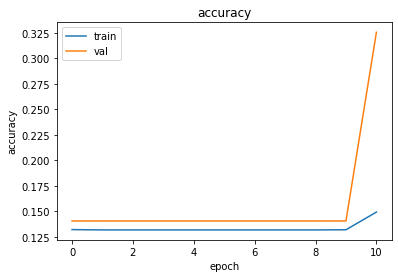

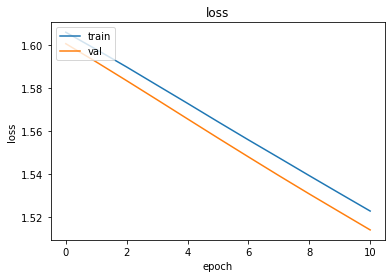

--Algumas previsões---
Acurácia no banco de teste: 14.11%
x:
alisson * * * * * * * as * equipes estao * * * brasil * * * *
youtube * * * * streaming * europa * * * * * * * * * * * *
* * felipe * * * com felipao * * * * * * * * * * * *
caixa * * * * * * * * * * * * * * * * * * *
* * * * ribeiro * * * * * * * * * * * * * * *
* ganha * * * * * funciona * * * * * * * * * * * *
* * revela * * * com * * * * * * * * * * * * *
murray * * * * * * * * * roland * * * * * * * * *
* * * * sabemos * * * * * * clube com * * * * * * *
* hypolito revela * * bullying * * * * * * * * * * * * * *
y_hat:
['politica', 'politica', 'politica', 'politica', 'politica', 'politica', 'politica', 'politica', 'politica', 'politica']
y:
['esportes', 'tecnologia', 'esportes', 'economia', 'esportes', 'tecnologia', 'esportes', 'esportes', 'esportes', 'esportes']


In [16]:
from tensorflow import keras
from keras import layers

VOCAB_SIZE_X = len(titulo_tokenizer.dic) # 1000
TIME_STEPS = MAX_LENGTH_TITLE # 77
VOCAB_SIZE_Y = len(assuntos_tokenizer.word_index) # 5


# Modelo RNN
modelo = keras.Sequential(
    [
     keras.Input(shape=(TIME_STEPS, VOCAB_SIZE_X), name="Input"),
     layers.LSTM(1, return_sequences=True),
     layers.LSTM(1),
     layers.Dense(VOCAB_SIZE_Y, activation= "softmax")
    ]
)

modelo.summary()

# Treinando modelo
modelo.compile(optimizer='adam', metrics=['accuracy'], loss= keras.losses.categorical_crossentropy)

y = modelo(X_train[0:1])


hist = modelo.fit(x = X_train,
                  y = Y_train,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  verbose=0,
                  callbacks=keras.callbacks.EarlyStopping('accuracy',
                                                          patience=10,
                                                          min_delta=0.05,
                                                          restore_best_weights=True)
                  )

# Grafico
plot(hist)

# Previsões
y_hat = modelo(X_test[0:10])

x = [one_hot_decode(y) for y in X_test[0:10] ]
y_hat_num = [np.argmax(k) for k in y_hat]
y = one_hot_decode(Y_test[0:10])

x_tx = titulo_tokenizer.for_idx_data2_text(x)
y__hat_tx = [assuntos_tokenizer.index_word[n + 1] for n in y_hat_num]
y_tx = [assuntos_tokenizer.index_word[n + 1] for n in y]

y_hat_v = modelo.evaluate(X_test, Y_test, verbose=0)
x_tx = "\n".join([re.sub("<OAV>","*",' '.join(x)) for x in x_tx])


print("--Algumas previsões---")
print(f'Acurácia no banco de teste: {round(y_hat_v[1]*100, 2)}%')
print(f'x:\n{x_tx}\ny_hat:\n{y__hat_tx}\ny:\n{y_tx}')

keras.backend.clear_session()


## Seq-Seq

### Modelo: *teaching forcing*

Em vez de calcular o erro da predição, colocamos a resposta $y$ no output para que o modelo se adeque rápido.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 20)            5360      
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            14200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 20)            5680      
_________________________________________________________________
time_distributed (TimeDistri (None, 12, 46)            966       
Total params: 26,206
Trainable params: 26,206
Non-trainable params: 0
_________________________________________________________________


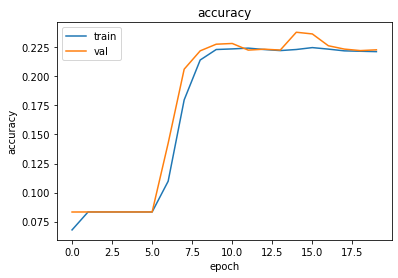

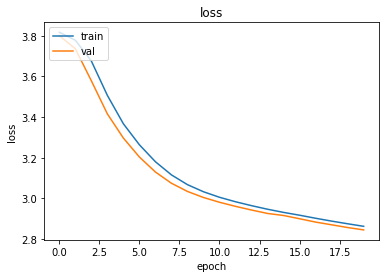

In [15]:
from tensorflow import keras
from keras import layers

VOCAB_SIZE = len(content_tokenizer.dic)
TIME_STEPS = SEQ_LENGTH + 2 # 30 + (<START> e <END>)

# Modelo RNN
modelo = keras.Sequential(
    [
     keras.Input(shape=(TIME_STEPS, VOCAB_SIZE), name="Input"),
     layers.LSTM(20, return_sequences=True),
     layers.LSTM(50, return_sequences=True),
     layers.LSTM(20, return_sequences=True),
     layers.TimeDistributed(layers.Dense(VOCAB_SIZE, activation= "softmax"))
    ]
)

modelo.summary()

# Treinando modelo
modelo.compile(optimizer='adam', metrics=['accuracy'], loss= keras.losses.categorical_crossentropy)

y = modelo(hot_X[0:3])


hist = modelo.fit(x = hot_X,
                  y = hot_Y,
                  validation_split=0.2,
                  batch_size = 1000,
                  epochs=200,
                  verbose=0,
                  callbacks=keras.callbacks.EarlyStopping('accuracy',
                                                          patience=10,
                                                          min_delta=0.005,
                                                          restore_best_weights=True)
                  )

hot_X.shape
hot_Y.shape

# Grafico
plot(hist)

# Previsões
y_hat = modelo(hot_X[0:10])

keras.backend.clear_session()

# (EM DESENVOLVIMENTO)

## Encode-Decode (Seq2Seq)

In [ ]:
MAX_LENGTH_TITLE = 26
MAX_LENGTH_POEM = 30



data_Econder_inputs = pad_sequences(data['Econder_inputs'], maxlen=MAX_LENGTH_TITLE, padding='post', truncating='post')

data_Decoder_inputs = pad_sequences(data['Decoder_inputs'], maxlen=MAX_LENGTH_POEM, padding='post', truncating='post')

data_Decoder_targets = pad_sequences(data['Decoder_targets'], maxlen=MAX_LENGTH_POEM, padding='post', truncating='post')


Encoder_Train, Encoder_Test, _, _ = train_test_split(data_Econder_inputs, data_Decoder_inputs, test_size = 0.2, random_state=5)
Decoder_Train, Decoder_Test, Target_Train, Target_Test  =  train_test_split(data_Decoder_inputs, data_Decoder_targets, test_size = 0.2, random_state=5)

Target_Train = keras.utils.to_categorical(Target_Train, num_classes=VOCAB_SIZE_DECODER)
Target_Test = keras.utils.to_categorical(Target_Test, num_classes=VOCAB_SIZE_DECODER)


In [ ]:
# The embedding dimension
embedding_dim_Encoder = 60
embedding_dim_Decoder =  300
VOCAB_SIZE_ENCODER = VOCAB_SIZE_DECODER

# Number of RNN units
rnn_units = 100


## Encoder
encode_input = keras.Input(shape=(None,), name="title")
encode_features = layers.Embedding(VOCAB_SIZE_ENCODER, embedding_dim_Encoder)(encode_input) 
encoder = layers.LSTM(rnn_units, return_state=True, name = 'encode')
encode_output, state_h, state_c = encoder(encode_features)

# Estado da celula 
encoder_state = [state_h, state_c]

#layers.Bidirectional

#layers.CuDNNLSTM

## Decoder
decode_input = keras.Input(shape=(None,), name="content")
decode_features = layers.Embedding(VOCAB_SIZE_DECODER, embedding_dim_Decoder)(decode_input)
decode = layers.LSTM(rnn_units, return_state=True, return_sequences=True, name = 'decode')
decode_out, _, _ = decode(decode_features, initial_state = encoder_state)
decoder_outputs = layers.Dense(VOCAB_SIZE_DECODER, activation="softmax")(decode_out)

# Estado da celula 


model = keras.Model([encode_input, decode_input], decoder_outputs)
model.summary()

#keras.backend.clear_session()

#keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

hist = model.compile(
    optimizer=keras.optimizers.Adam(1e-2),
    loss = "categorical_crossentropy",
    metrics = "acc"
)

#class CustomCallback(keras.callbacks.Callback):
#  def on_epoch_end(self, epoch, logs=None):
#    if 0 == epoch%1: 
#        print(f'Época: {epoch} \n output:{logs["predict"]}')
        

history = model.fit([Encoder_Train, Decoder_Train], Target_Train,
          batch_size = 5000,
          validation_split=0.2,
          callbacks=[keras.callbacks.EarlyStopping('loss', min_delta=0.1, patience=3, restore_best_weights=True)],
          epochs=10, verbose=2)


plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
# Predições 
pred = model.predict([Encoder_Test, Decoder_Test])

def deconder_as(pred, num):
  
  nums = [int(u) for u in (np.random.uniform(0, len(Encoder_Test), 3))]
  
  for i in nums:
    print(i)
    preds = tf.random.categorical(pred[i], num_samples=1).numpy()

    enc = tokenizer_Encoder.sequences_to_texts(np.array([ [idx] for idx in tf.squeeze(Encoder_Test[(i):(i+1)])]))
    res = tokenizer_Decoder.sequences_to_texts(preds)
    tgt = tokenizer_Decoder.sequences_to_texts([[idx] for idx in Decoder_Test[i]])
    print(f'Encode: \n>{"".join(enc)}')
    print(f'Previsto:  \n>{" ".join(res)}')
    print(f'Real: \n>{" ".join(tgt)}' )
    print('-------------------\n')
deconder_as(pred,3)


#def generating(title, num_words):
#  words = []
#  # Encoded
#  e_text = tokenizer_Encoder.texts_to_sequences("title")
#
#  encode_output, state_h, state_c = Econder_model(e_text)
#  encoder_state = [state_h, state_c]
#
#  # Decoded
#  decode_input = keras.Input(shape=(None,), name="content")
#  decode_features = layers.Embedding(VOCAB_SIZE_DECODER, embedding_dim_Decoder)(decode_input)
#  decode = layers.LSTM(rnn_units, return_state=True, return_sequences=True, name = 'decode')
#  decode_out, state_h, state_c = decode(decode_features, initial_state = encoder_state)
#
#  decoder_state = [state_h, state_c]
#
#
#  decoder_outputs = layers.Dense(VOCAB_SIZE_DECODER, activation="softmax")(decode_out)
#
#
#
#  decoded_model = keras.Model(decode_input, decode_out)
#  
#  pred = Decoder_model()
#
#  words.append(decode_out)
#  
#  for word in range(num_words):
#
#    decode_out, state_h, state_c = decode(decode_features, initial_state = encoder_state)
#
#    decoder_state = [state_h, state_c]
#
#    words.append(decode_out)

#    decoder_outputs = layers.Dense(VOCAB_SIZE_DECODER, activation="softmax")(decode_out)
#    decoded_model = keras.Model(decode_input, decode_out)


